In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
plt.rcParams['axes.unicode_minus'] = False #允许坐标轴上显示负数
plt.rcParams['font.sans-serif'] = ['SimHei'] #显示中文
plt.style.use('ggplot')   # 使用自带的样式进行美化

In [27]:
data = pd.read_csv('C:/Users/Administrator/Desktop/train.csv') #读取csv文件

In [28]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
#data.isnull().sum()将缺失项的数据全部加起来
print("缺少数据:\n",data.isnull().sum())

缺少数据:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [38]:
#对Age填补空值
data['Age'] = data['Age'].fillna(data['Age'].median())
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0,0.5,'人数')

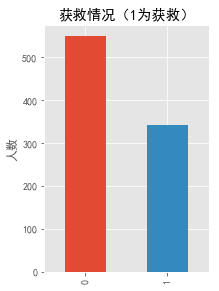

In [39]:
#首先设定一个画布或者叫图纸，尺寸为10x10
fig = plt.figure(figsize=(10,10))
fig.set(alpha=0.5)  #设定图标颜色alpha参数

#其次，统计生还者与遇难者的比例
#用pandas的value_count()函数就可以统计出survived取不同值的总数
plt.subplot2grid((2,3),(0,0)) #在一张大图里，（2,3）表示图像分布为2行3列，（0,0）指的是第一行第一列
data.Survived.value_counts().plot(kind = 'bar') #bar表示画条形图，value_counts()表示字段中相同数据的个数
plt.title("获救情况（1为获救）")#puts a title on our graph
plt.ylabel("人数")

Text(0.5,1,'乘客等级分布')

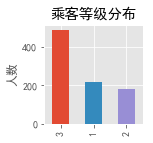

In [40]:
#同理统计一下乘客等级分布的情况
plt.subplot2grid((2,3),(0,1)) #画第二幅图
data.Pclass.value_counts().plot(kind='bar')
plt.ylabel("人数")
plt.title("乘客等级分布")

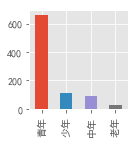

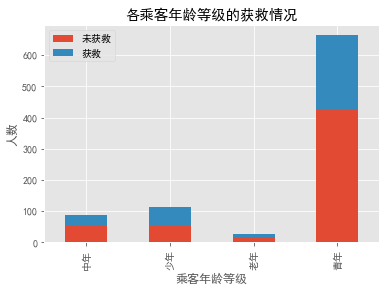

In [64]:
#同理统计一下乘客年龄分布的情况
plt.subplot2grid((2,3),(0,2)) #画第二幅图
data['Age2']=0
data.loc[(data['Age']>0)&(data['Age']<18),'Age2']='少年'
data.loc[(data['Age']>=18)&(data['Age']<45),'Age2']='青年'
data.loc[(data['Age']>=45)&(data['Age']<60),'Age2']='中年'
data.loc[data['Age']>=60,'Age2']='老年'
data.Age2.value_counts().plot(kind='bar')
#利用布尔过滤的方法，从乘客等级列表中抽出生还者和遇难者，再进行统计各等级乘客的生还者个数
Survived_0 = data.Age2[data.Survived == 0].value_counts() 
Survived_1 = data.Age2[data.Survived == 1].value_counts()
df0 = pd.DataFrame({'获救':Survived_1, '未获救':Survived_0}) 
df0.plot(kind='bar', stacked=True) #设置stacked=True即可为DataFrame生成堆积柱形图
plt.title("各乘客年龄等级的获救情况")
plt.xlabel("乘客年龄等级") 
plt.ylabel("人数") 
plt.show()

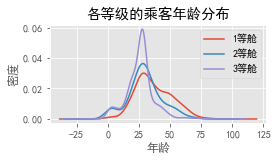

In [41]:
plt.subplot2grid((2,3),(1,0), colspan=2)#colspan=2表示在选中区域的延伸
data.Age[data.Pclass == 1].plot(kind='kde')#从年龄表中抽出乘客等级为1的名单，作出密度曲线  
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
plt.xlabel("年龄")  #横轴标签设为年龄
plt.ylabel("密度") 
plt.title("各等级的乘客年龄分布")
plt.legend(('1等舱', '2等舱','3等舱'),loc='best')  #legend表示增加图例，loc表示图例所放位置

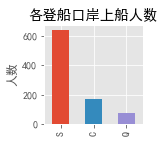

In [42]:
plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar')
plt.title("各登船口岸上船人数")
plt.ylabel("人数")
plt.show()

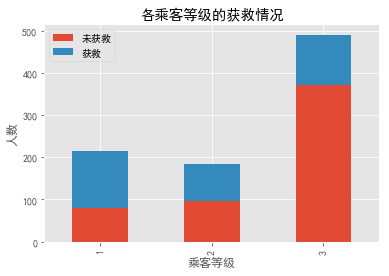

In [43]:
#看看各乘客等级的获救情况
fig = plt.figure(figsize=(5,5))
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
#利用布尔过滤的方法，从乘客等级列表中抽出生还者和遇难者，再进行统计各等级乘客的生还者个数
Survived_0 = data.Pclass[data.Survived == 0].value_counts() 
Survived_1 = data.Pclass[data.Survived == 1].value_counts()
df = pd.DataFrame({'获救':Survived_1, '未获救':Survived_0}) 
df.plot(kind='bar', stacked=True) #设置stacked=True即可为DataFrame生成堆积柱形图
plt.title("各乘客等级的获救情况")
plt.xlabel("乘客等级") 
plt.ylabel("人数") 
plt.show()

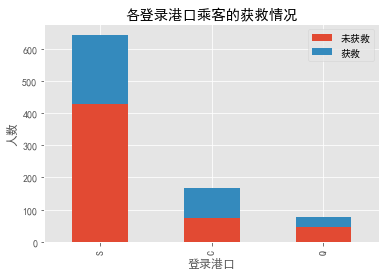

In [44]:
#看看各登录港口的获救情况
ig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
Survived_0 = data.Embarked[data.Survived == 0].value_counts()
Survived_1 = data.Embarked[data.Survived == 1].value_counts()
df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u"各登录港口乘客的获救情况")
plt.xlabel(u"登录港口") 
plt.ylabel(u"人数") 
plt.show()

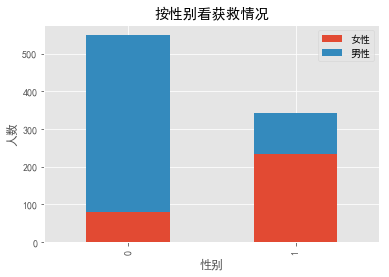

In [45]:
#看看各性别的获救情况
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数
Survived_m = data.Survived[data.Sex == 'male'].value_counts()
Survived_f = data.Survived[data.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

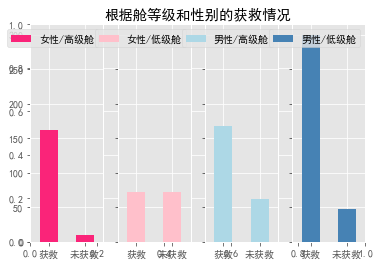

In [46]:
#然后我们再来看看各种舱级别情况下各性别的获救情况
fig=plt.figure()
fig.set(alpha=0.65) # 设置图像透明度，无所谓
plt.title(u"根据舱等级和性别的获救情况")
 
ax1=fig.add_subplot(141)   #subplot和add_subplot区别
data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts().plot(kind='bar', label="female highclass", color='#FA2479')#label？？
ax1.set_xticklabels([u"获救", u"未获救"], rotation=0) #将0,1换成未获救，获救
ax1.legend([u"女性/高级舱"], loc='best')

ax2=fig.add_subplot(142, sharey=ax1)  #sharey=???
data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts().plot(kind='bar', label='female, low class', color='pink')
ax2.set_xticklabels([u"获救", u"未获救"], rotation=0)
plt.legend([u"女性/低级舱"], loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts().plot(kind='bar', label='male, high class',color='lightblue')
ax3.set_xticklabels([u"获救", u"未获救"], rotation=0)
plt.legend([u"男性/高级舱"], loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts().plot(kind='bar', label='male low class', color='steelblue')
ax4.set_xticklabels([u"获救", u"未获救"], rotation=0)
plt.legend([u"男性/低级舱"], loc='best')

plt.show()

In [47]:
g = data.groupby(['SibSp','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [48]:
g = data.groupby(['Parch','Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [49]:
#ticket是船票编号，应该是unique的，和最后的结果没有太大的关系，不纳入考虑的特征范畴
#cabin只有204个乘客有值，我们先看看它的一个分布
data.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F2                 3
C22 C26            3
E101               3
D                  3
F33                3
D33                2
E8                 2
E25                2
C123               2
F4                 2
B28                2
B35                2
C2                 2
E24                2
C83                2
B77                2
E44                2
C93                2
C52                2
B49                2
B58 B60            2
B20                2
D17                2
C78                2
B22                2
B57 B59 B63 B66    2
C124               2
                  ..
C50                1
B39                1
B4                 1
C90                1
C85                1
B19                1
B38                1
E50                1
C30                1
B41                1
C70                1
E10                1
A7                 1
C106               1
D28                1
B102               1
B101         

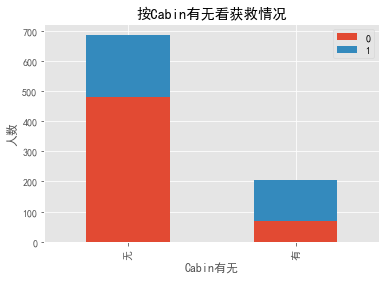

In [50]:
#cabin的值计数太分散了，绝大多数Cabin值只出现一次。感觉上作为类目，加入特征未必会有效
#那我们一起看看这个值的有无，对于survival的分布状况，影响如何吧
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_cabin = data.Survived[pd.notnull(data.Cabin)].value_counts()
Survived_nocabin = data.Survived[pd.isnull(data.Cabin)].value_counts()
df=pd.DataFrame({u'有':Survived_cabin, u'无':Survived_nocabin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title(u"按Cabin有无看获救情况")
plt.xlabel(u"Cabin有无") 
plt.ylabel(u"人数")
plt.show()

